<h1><center>--Spam-Filtering--💌--🎭--</center></h1>

<center><img src= "https://images.unsplash.com/flagged/photo-1560854350-13c0b47a3180?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1142&q=80" alt ="Diabetes" style='width: 600px;'></center>

<h3>SPAM ?</h3>

<b>Simply, Message we don't like, like:</b>

* commercial solicitations.
* advertisements.
* chain letters.
* pyramid schemes.
* fraudulent offers.


<h3>OK! Why should I do a model for this ??</h3>

* classifing it by ourselves consume time, cost and effort.
* Human can't be accuracte every minute & spam don't stop

<h3>Ready ! :</h3>

* 📚 Libraries

* 📕 Load Data

* 🔍 EDA(1)

* 🧽 Data Cleannig

* 🔍 EDA(2)

* 🎬 Preprocessing

* 🏗️ Model building

* 📏 Perofrmance measurements

* 👌 Cross validation


# 📚 Libraries

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import joblib as jb

from sklearn.metrics import plot_roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# 📕 Load Data

In [52]:
data=pd.read_csv('C:/Users/Jamil/spam filtering/spam.csv', encoding='latin-1', usecols = ['v1', 'v2'])

# 🔍 Exploratory Data Analysis (1)


In [53]:
pd.set_option('display.max_columns', 500)

In [54]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


💡 need to change col-names & extract nore useful information from data

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


💡 I will try to make it numeric data as possible as i can in cleaning step

In [56]:
data.shape

(5572, 2)

### 🤔 is there any Duplicates ?

In [57]:
data.duplicated().sum()

403

💡 must deleted in cleaning step

### 😨 What about NaN values?

In [58]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

💡 no null values, Good!

### 😱 is it balanced data?

In [59]:
classes = data.groupby('v1').count()
classes['v2']

v1
ham     4825
spam     747
Name: v2, dtype: int64

([<matplotlib.patches.Wedge at 0x1f0e240c4c8>,
 [Text(-1.0461621424642782, 0.33991877217145816, 'HAM'),
  Text(1.1412677657401706, -0.37082055887240045, 'SPAM')])

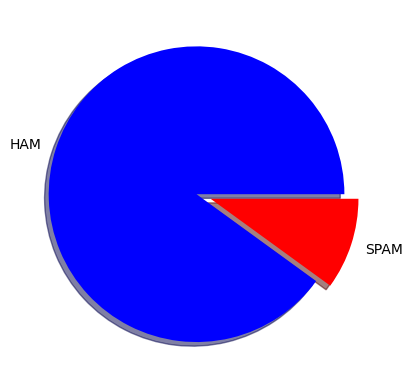

In [60]:
slice= list(round(data['v1'].value_counts(normalize = True), 1))
label= ["HAM", "SPAM"]
colors = ["blue", "red"]
explode = [0, 0.1]

plt.pie(slice, labels = label, colors = colors, explode = explode, shadow = True)

💡 Unfortunately not. it is <b>im</b>Balanced data.<br>

# 🧽 Data Cleaning | _Action begin_

#### Add relevant columns Names!

In [61]:
data = data.rename({"v1": "class", "v2": "documents"}, axis = 1)
data.head(2)

,class,documents
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


#### transform classes into binary

In [62]:
data['class'] = data['class'].map({'spam' : 1, 'ham' : 0}) #simple

✨ Done transformtion

#### Delete Duplicated data

In [63]:
data.drop_duplicates(keep = 'first', inplace = True)
data.shape

(5169, 2)

✨ duplicated data solved

#### Apply UnderSampling

<img src= "https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png"  alt ="Diabetes" style='width: 600px;' align="left" >

In [64]:
counts_class_0, counts_class_1 = data['class'].value_counts() 

data_c0 = data[data['class'] == 0]
data_c1 = data[data['class'] == 1]

data_under_c0 = data_c0.sample(counts_class_1, random_state = 42)

data_under = pd.concat([data_under_c0, data_c1], axis = 0)

data_under.shape

(1306, 2)

0    653
1    653
Name: class, dtype: int64


([<matplotlib.patches.Wedge at 0x1f0e245ef08>,
 [Text(-1.1, 1.3471114790620887e-16, 'HAM'),
  Text(1.1, -2.6942229581241775e-16, 'SPAM')])

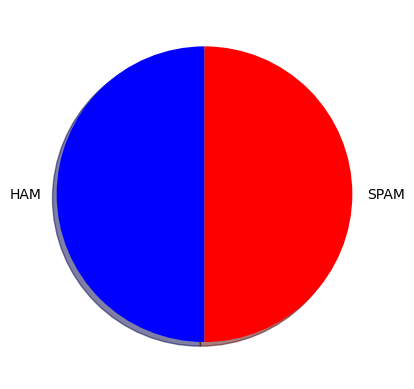

In [65]:
view = data_under['class'].value_counts()

slice= list(round(view, 1))
label= ["HAM", "SPAM"]
colors = ["blue", "red"]

print(view)
plt.pie(slice, labels = label, colors = colors, shadow = True, startangle  = 90)

✨ Now it became <b>Balanced Data</b>

----------------------------------------------------------------

### EDA: how is bigger spam messages or Ham messages ? 

----------------------------------------------------------------

#### getting numbers of characters

In [66]:
data_under['Nom_chars'] = data_under['documents'].str.len()
data.columns

Index(['class', 'documents'], dtype='object')

#### getting numbers of words

In [67]:
data_under['Nom_words'] = data_under['documents'].str.split().apply(len)
data_under.columns

Index(['class', 'documents', 'Nom_chars', 'Nom_words'], dtype='object')

# 🔍 Exploratory Data Analysis (2)

In [68]:
data_under.describe().apply(round)

,class,Nom_chars,Nom_words
count,1306.0,1306.0,1306.0
mean,0.0,104.0,19.0
std,1.0,57.0,10.0
min,0.0,2.0,1.0
25%,0.0,48.0,10.0
50%,0.0,115.0,20.0
75%,1.0,152.0,26.0
max,1.0,588.0,125.0


<AxesSubplot:>

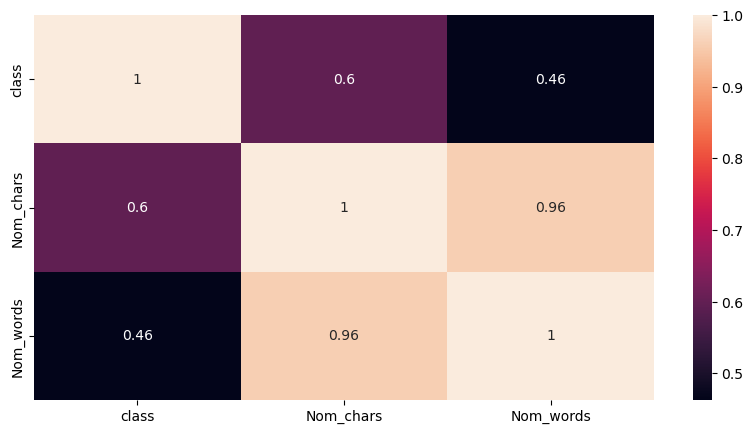

In [69]:
corel = data_under.corr(method = 'pearson').abs()
fig = plt.figure(figsize=(10,5))
sns.heatmap(corel, annot = True)

In [70]:
round(data_under.groupby('class').agg([np.mean,np.min,np.max]))

Nom_chars           Nom_words          
           mean amin amax      mean amin amax
class                                        
0          70.0    2  588      14.0    1  125
1         138.0   13  224      24.0    2   35

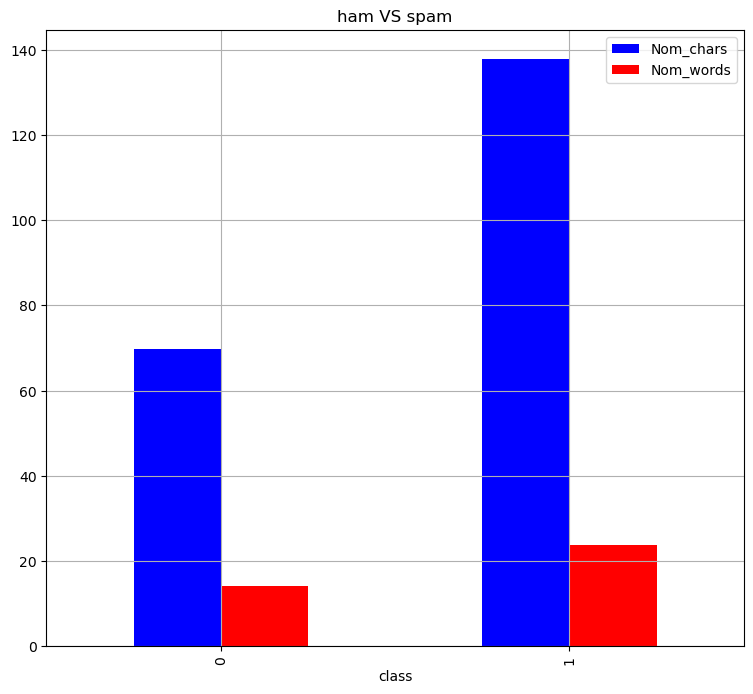

In [71]:
avg = data_under.groupby('class').mean()

avg.plot(kind='bar',figsize = (9, 8),title='ham VS spam', color = ['blue', 'red'])
plt.grid(True)

it shows that spam messages (= 1) has more numbers of characters and words. <br>
💡 <b>So Spam messages seems larger than Ham</b>

# 🎬 Preprocessing Data

#### Lower case

In [72]:
data_under['pre_pro_doc'] = data_under['documents'].str.lower()

#### delete punctuations

In [73]:
data_under['pre_pro_doc'] = data_under['pre_pro_doc'].str.replace(r'[^\w\s]+', '')

#### removing stop words using tockenization

In [74]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

data_under['pre_pro_doc'] = data_under['pre_pro_doc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) ]))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Perfect! we Got preprocessed data

# 🏗️ Model Building

#### Bag of Words & Splitting data

In [75]:
count_vec  = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(data_under['pre_pro_doc'], data_under["class"], test_size = 0.2)

training_data = count_vec.fit_transform(X_train)

testing_data = count_vec.transform(X_test)

#### Build & Train algorithm

In [76]:
naive_bayes = MultinomialNB()

naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)

# 📏 Performance Measurement

#### Checking ROC curve | Quality of Splitting

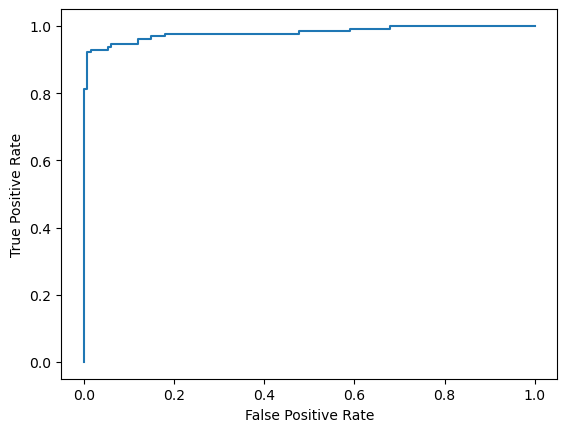

In [77]:
#checking how good splitting it is:
from sklearn.metrics import roc_curve

y_pred_proba = naive_bayes.predict_proba(testing_data)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

💡 Roc curve show high performance on spiltting data

#### checking perfromance | Accuracy, Precison..etc

              precision    recall  f1-score   support

         Ham       0.94      0.90      0.92       134
        Spam       0.90      0.95      0.92       128

    accuracy                           0.92       262
   macro avg       0.92      0.92      0.92       262
weighted avg       0.92      0.92      0.92       262



<AxesSubplot:>

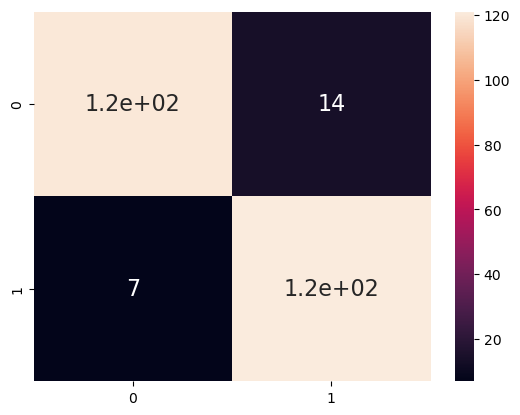

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

#Report Printing
print(classification_report(y_test,predictions,target_names=['Ham','Spam']))

#Confusion Matrix
conv = confusion_matrix(y_test, predictions)
sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})

💡 from Confusion Matrix it shows that algorithm perfect classify spam and Ham pretty well !

💡 Notice:<br> here we are more interested in  Precision becuause its focus on predictive positive that include<br> 
   false positive which is more importat than others for spam filtering

# 💯👌 Cross Validation

above we see that measuring perfromance change every time runing code.<br>
so i applied cross validation to get the best possible result.<br>

i also want to get classifiaction report for best mesured performance<br>
and  its confusion matrix so i created that function below to do that !

In [79]:
tprs = [] #ROC
aucs = [] #AUC
class_repo_lst = [] #Classification reports
acc_repo = [] #accuracies
conv_lst = [] #Confusion matrices
accruacy_scores_lst = []

In [80]:
from sklearn.metrics import accuracy_score

def cross_validate_Model(classifier ,choice):
    '''
    parameters : 
    
     1- classifier : Algorithm to train
     2- choice : choose what you see.
                 - 'r': Report classifation & Roc_Curve
                 - 'c': Confusion Matrix
    '''
    
    #----------Data------------------
    X = np.array(data_under["pre_pro_doc"])
    y = np.array(data_under['class'])
    X, y = X[y != 2], y[y != 2]
    #----------Variables-------------
    cv = StratifiedKFold(n_splits=20)
    mean_fpr = np.linspace(0, 1, 100)

    #--------------------------------
    fig, ax = plt.subplots()
    vec = CountVectorizer()

    for i, (train, test) in enumerate(cv.split(X, y)):
        
        
        training_data = vec.fit_transform(X[train])
        
        testing_data = vec.transform(X[test])
        jb.dump(vec,'vec.sav')


        classifier.fit( training_data, y[train])  #fitting algoirthm

        y_pred = classifier.predict(testing_data) #getting prediction
        
        accruacy_scores_lst.append(accuracy_score(y[test], y_pred)) #save all accuraies in list
        
        #=========================================================================
        repo = classification_report(y[test], y_pred, target_names=['Ham','Spam']) 
        class_repo_lst.append(repo) 
        acc_repo.append(float(repo[203:207])) #get accuracy on spam 
        indx = acc_repo.index(max(acc_repo))
        #=========================================================================== 
                                   
        if choice == 'c':
            conv_lst.append(confusion_matrix(y[test], y_pred))
        
        if choice == 'r':
            #------plot-every-fold----------------------------------------------------------------------------------
            viz = plot_roc_curve(classifier, testing_data, y[test], name="", alpha=0.3, lw=1, ax=ax)
            #-------------------------------------------------------------------------------------------------------

            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0

            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

    if choice == 'r':
        #------plotting-AUC----------------------------------------------------------------
        ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
        #----------------------------------------------------------------------------------

        mean_tpr = np.max(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        #------plotting-ROC------------------------------------------------------------------------------------------------------
        ax.plot(mean_fpr, mean_tpr, color='b', lw=2, alpha=.8)
        #-------------------------------------------------------------------------------------------------------------------------

        print(class_repo_lst[indx])


    
    if choice == 'c':
        conv = conv_lst[indx]
        sns.heatmap(conv, annot = True, annot_kws = {"size" : 16})
        plt.show()
    
    
    if choice == 'r':
        ax.set(title="Maximum ROC curve after cross validation")
        ax.get_legend().remove()
        plt.show()
      
    
    class_repo_lst.clear()
    acc_repo.clear()
    conv_lst.clear()
    jb.dump(classifier,'spammodel.sav')
        
    return  "Max_Accuracy : " + str(round(np.array(accruacy_scores_lst).max(), 4)) + "%"                              

In [81]:
print(np.array(data_under["pre_pro_doc"]))

['come slave going shell unconsciously avoiding making unhappy'
 'u meet fren dun wan meet ah muz b guy rite'
 'g says never answer texts confirmdeny' ...
 'contract mobile 11 mnths latest motorola nokia etc free double mins text orange tariffs text yes callback remove records'
 'reminder o2 get 250 pounds free call credit details great offers pls reply 2 text valid name house postcode'
 '2nd time tried 2 contact u u å750 pound prize 2 claim easy call 087187272008 now1 10p per minute btnationalrate']


              precision    recall  f1-score   support

         Ham       1.00      0.97      0.98        32
        Spam       0.97      1.00      0.99        33

    accuracy                           0.98        65
   macro avg       0.99      0.98      0.98        65
weighted avg       0.99      0.98      0.98        65



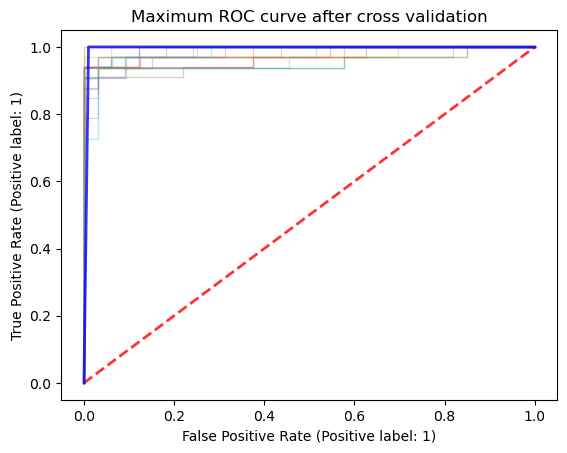

'Max_Accuracy : 0.9846%'

In [82]:
cross_validate_Model( MultinomialNB() ,'r')

💡 Roc curve shows perfect spiltting data

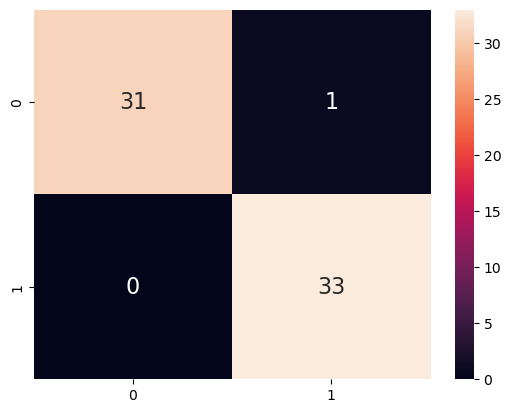

'Max_Accuracy : 0.9846%'

In [83]:
cross_validate_Model( MultinomialNB(), 'c')

💡 Confusion matrix shows high quality classifiaction

In [84]:
from sklearn.model_selection import cross_val_score

BoW = count_vec.fit_transform(data_under["pre_pro_doc"])

cross_val_score(naive_bayes, BoW, data_under["class"], scoring="accuracy", cv = 20).max()

0.9846153846153847

# Accuracy 98.46%

#Save Model 


# Single Prediction

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import joblib as jb


In [2]:
#Load Classifier
classifier=jb.load('spammodel.sav')
count_vec=jb.load('vec.sav')

In [3]:
#Enter Email
message1='8,winner valued network customer selected receivea أ¥900 prize reward claim call 09061701461 claim code kl341 valid 12 hours'

In [9]:
message2='5289,hey congrats 2u2 id luv 2 ive 2 go home'

In [10]:
#Convert to count vectore
new_test = count_vec.transform([message2])

In [11]:
#predict Result
new_predictions = classifier.predict(new_test)

In [12]:
print(new_predictions)



[0]


In [ ]:
from tkinter import *
import tkinter as tk


def spam():
    e1=Entry(window)
    e_text=e1.get()
    #Convert to count vectore
    new_test1 = count_vec.transform([e_text])
    #predict Result
    new_predictions1 = classifier.predict(new_test1)
    e1.place(x=280,y=460)
    label2.config(text=new_predictions)
    if new_predictions==[0]:
        label2.config(text="not spam")
    else:
        label2.config(text="spam")
 
        

window=Tk()
window.title("Email Spam Filter")
#lb.config(image=ax,compound='center')
lb=Button(window,text='')
lb.pack()
lb.config(foreground='pink')
ax=PhotoImage(file='C:/Users/Jamil/Desktop/sw.png',master=window)
lb.config(image=ax,compound='center')

label= Label(window, text = "Email Spam Detection Using AI", bg='pink')
label.place(x=260,y=430)

label2= Label(window, text='')
label2.place(x=300,y=550)

#label3=Label(image=ax,compound='center')
#label3.place(x=100,y=30)

e1=Entry(window)
e1.place(x=280,y=460)
bt= Button(window, text="Predict", command=spam,bg='black', fg='white')
bt.place(x=300,y=490)

label4= Label(window, text='Enter email')
label4.place(x=210,y=460)
window.geometry('600x600')
window.mainloop()


